### Basic QC for non-human primate samples (Hughes)

#### Objective: Run basic QC for week 4 BAL samples in non-human primates from Hughes et al 2020



- **Developed by**:  Mairi McClean

- **Computational Health Centre - Helmholtz Munich**

- v230403

In [1]:
# Sanity check
import os 
os.write(1, b"text\n")

text


5

### Load modules

In [2]:
# check that all modules required throughout the notebook are present here in one cell

import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import matplotlib.pyplot as plt
import igraph as ig
from matplotlib import colors
from matplotlib import rcParams

### Log files and figure output settings

In [3]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.2
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.3
arrow               1.2.3
asttokens           NA
attr                22.2.0
babel               2.12.1
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
brotli              NA
certifi             2022.12.07
cffi                1.15.1
charset_normalizer  2.1.1
colorama            0.4.6
comm                0.1.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.6
decorator           5.1.1
executing           1.2.0
fastjsonschema      NA
fqdn                NA
h5py                3.8.0
hypergeom_ufunc     NA
idna                3.4
igraph              0.10.4
ipykernel           6.21.2
ipython_genutils    0.2.0
isoduration         NA
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
json5               NA
jsonpointer         2.3
jsonschema          4.17.3
jupyter_events

### Read in data


In [4]:
# Read in 1st object
adata_1 = sc.read_h5ad('/Volumes/LaCie/data_lake/Carlos_example/Hughes2020/SCP1749/SCP1749_4WPI_granuloma_nHP.raw.h5ad')
adata_2

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 10006 × 24820
    var: 'gene_ids'

In [ ]:
# Read in 2nd object

adata_2 = sc.read_h5ad('/Volumes/LaCie/data_lake/Carlos_example/Hughes2020/SCP257_10WPI_granuloma_nHP_1.raw.h5ad')
adata_2

In [ ]:
# Read in 3rd object

adata_3 = sc.read_h5ad('/Volumes/LaCie/data_lake/Carlos_example/Hughes2020/SCP257_10WPI_granuloma_nHP_2.raw.h5ad')
adata_3

#### Concatenate objects

In [ ]:
adata_merged = adata_1.concatenate(adata_2, adata_3, join="inner", batch_key="object_number", batch_categories=['1', '2', '3'])
adata_merged

### Pre-processing

In [5]:
adata.var

,gene_ids
A2ML1,A2ML1
A3GALT2,A3GALT2
A4GALT,A4GALT
AAAS,AAAS
AACS,AACS
...,...
ZYG11A,ZYG11A
ZYG11B,ZYG11B
ZYX,ZYX
ZZEF1,ZZEF1


In [6]:
adata.obs

""
Array4_23118_TATTACCCCGCA
Array4_23118_CTCTTCCGCCTA
Array4_23118_CATGTCTCCTGC
Array4_23118_GTAACTCCCCGA
Array4_23118_CGCCGTCTGATC
...
Array6_24118_CGAATATTCCAA
Array6_24118_TCTTGATCGCCC
Array6_24118_CTACCCTGTCGT
Array6_24118_CGTCGGCATCCT


In [7]:
adata.X

<10006x24820 sparse matrix of type '<class 'numpy.float32'>'
	with 14222226 stored elements in Compressed Sparse Row format>

#### Replace gene symbols

#### Make names unique


In [ ]:
# Check adata object name
# adata.var_names_make_unique()
# sample_object = adata.copy()
# sample_object

#### Top 20 scatterplot

normalizing counts per cell
    finished (0:00:00)


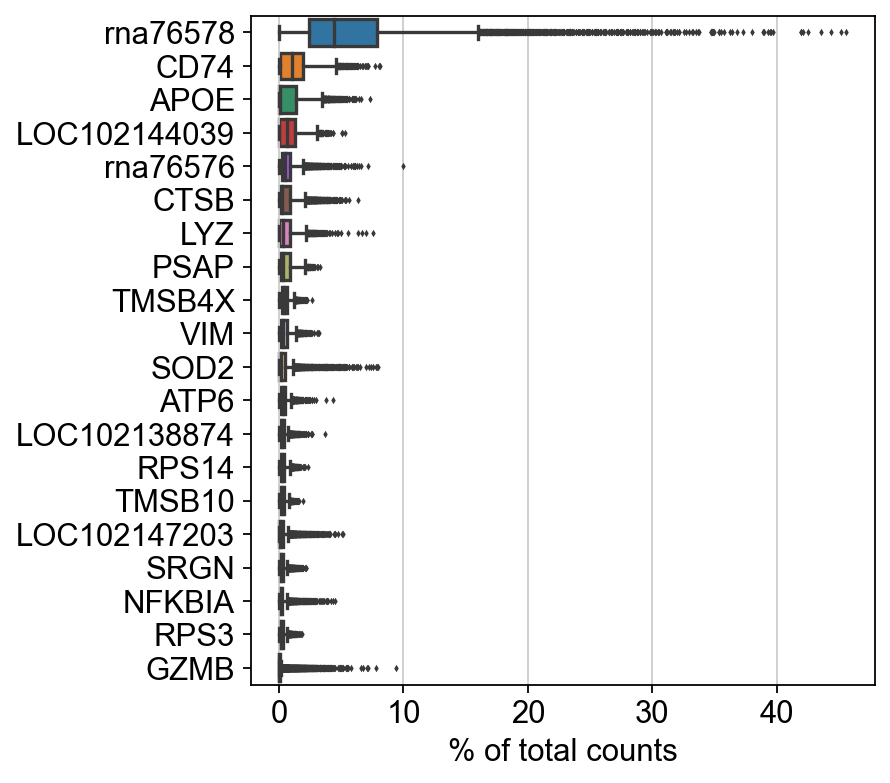

In [8]:
sc.pl.highest_expr_genes(adata, n_top=20)

##### Initial filtering

In [9]:
# Note: this step was added after mito and ribo gene steps, and the 'adata.var' changed significantly to include 'mean_counts, n_cells_by_counts, log1p_mean_counts, pct_dropout_by_counts, total_counts, and log1p_total_counts'
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 4878 genes that are detected in less than 3 cells


##### Annotation of mitochondrial and ribosomal genes

In [10]:
# Trying to find mitochondrial genes; not annotated with "mt" or "MT", therefore annotation will be manual
## str.startswith taken from scanpy pbmc tutorial
# Step 1: Make df of mito genes

mito_genes = ['RNR1', 'TV', 'TY', 'ATP8', 'ATP6', 'CO1', 'CO2', 'CO3', 'CYB', 'ND1', 'ND2', 'ND3', 'ND4L', 'ND4', 'ND5', 'ND6', 'RNR2', 'TA', 'TR', 'TN', 'TD', 'TC', 'TE', 'TQ', 'TG', 'TH', 'TI', 'TL1', 'TL2', 'TK', 'TM', 'TF', 'TP', 'TS1', 'TS2', 'TT', 'TW', 'TY', 'TV', 'RNR1']
print(mito_genes)



['RNR1', 'TV', 'TY', 'ATP8', 'ATP6', 'CO1', 'CO2', 'CO3', 'CYB', 'ND1', 'ND2', 'ND3', 'ND4L', 'ND4', 'ND5', 'ND6', 'RNR2', 'TA', 'TR', 'TN', 'TD', 'TC', 'TE', 'TQ', 'TG', 'TH', 'TI', 'TL1', 'TL2', 'TK', 'TM', 'TF', 'TP', 'TS1', 'TS2', 'TT', 'TW', 'TY', 'TV', 'RNR1']


In [11]:
# Make list into df
mito_genes_df = pd.DataFrame(mito_genes)
print(mito_genes_df)

       0
0   RNR1
1     TV
2     TY
3   ATP8
4   ATP6
5    CO1
6    CO2
7    CO3
8    CYB
9    ND1
10   ND2
11   ND3
12  ND4L
13   ND4
14   ND5
15   ND6
16  RNR2
17    TA
18    TR
19    TN
20    TD
21    TC
22    TE
23    TQ
24    TG
25    TH
26    TI
27   TL1
28   TL2
29    TK
30    TM
31    TF
32    TP
33   TS1
34   TS2
35    TT
36    TW
37    TY
38    TV
39  RNR1


In [12]:
# This makes a new column in "adata.var" called "mito" that will print "true/false" if the same information in gene_id is found in the mito_genes dataframe.

adata.var['mito'] = adata.var.gene_ids.isin(mito_genes_df[0].values)

In [13]:
adata.var

,gene_ids,n_cells,mito
A2ML1,A2ML1,7,False
A3GALT2,A3GALT2,7,False
A4GALT,A4GALT,709,False
AAAS,AAAS,364,False
AACS,AACS,720,False
...,...,...,...
ZXDC,ZXDC,440,False
ZYG11B,ZYG11B,315,False
ZYX,ZYX,1930,False
ZZEF1,ZZEF1,605,False


In [14]:
# Same for ribo genes

ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [ ]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [16]:
# Make a new column in the .var object called "ribo"
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

In [ ]:
adata.var


,gene_ids,n_cells,mito,ribo
A2ML1,A2ML1,7,False,False
A3GALT2,A3GALT2,7,False,False
A4GALT,A4GALT,709,False,False
AAAS,AAAS,364,False,False
AACS,AACS,720,False,False
...,...,...,...,...
ZXDC,ZXDC,440,False,False
ZYG11B,ZYG11B,315,False,False
ZYX,ZYX,1930,False,False
ZZEF1,ZZEF1,605,False,False


In [18]:
adata.obs

,n_genes
Array4_23118_TATTACCCCGCA,4583
Array4_23118_CTCTTCCGCCTA,4321
Array4_23118_CATGTCTCCTGC,4839
Array4_23118_GTAACTCCCCGA,3922
Array4_23118_CGCCGTCTGATC,4017
...,...
Array6_24118_CGAATATTCCAA,337
Array6_24118_TCTTGATCGCCC,354
Array6_24118_CTACCCTGTCGT,331
Array6_24118_CGTCGGCATCCT,323


###### Why is the obs just 1 column?

#### Need to add additional metadata from paper


##### QC metrics

In [19]:
# Note: would not accept log1p=false

sc.pp.calculate_qc_metrics(adata, qc_vars=['mito', 'ribo'], percent_top=None, inplace=True)
adata.obs

,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mito,log1p_total_counts_mito,pct_counts_mito,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo
Array4_23118_TATTACCCCGCA,4583,4583,8.430327,16699.0,9.723164,47.0,3.871201,0.281454,304.0,5.720312,1.820468
Array4_23118_CTCTTCCGCCTA,4321,4320,8.371242,15943.0,9.676838,84.0,4.442651,0.526877,255.0,5.545177,1.599448
Array4_23118_CATGTCTCCTGC,4839,4829,8.482602,14969.0,9.613804,36.0,3.610918,0.240497,353.0,5.869297,2.358207
Array4_23118_GTAACTCCCCGA,3922,3921,8.274357,12294.0,9.416948,53.0,3.988984,0.431105,219.0,5.393628,1.781357
Array4_23118_CGCCGTCTGATC,4017,4015,8.298042,12396.0,9.425210,83.0,4.430817,0.669571,183.0,5.214936,1.476283
...,...,...,...,...,...,...,...,...,...,...,...
Array6_24118_CGAATATTCCAA,337,337,5.823046,525.0,6.265301,3.0,1.386294,0.571429,28.0,3.367296,5.333333
Array6_24118_TCTTGATCGCCC,354,354,5.872118,511.0,6.238325,11.0,2.484907,2.152642,12.0,2.564949,2.348337
Array6_24118_CTACCCTGTCGT,331,331,5.805135,513.0,6.242223,8.0,2.197225,1.559454,8.0,2.197225,1.559454
Array6_24118_CGTCGGCATCCT,323,323,5.780744,509.0,6.234411,6.0,1.945910,1.178782,12.0,2.564949,2.357564


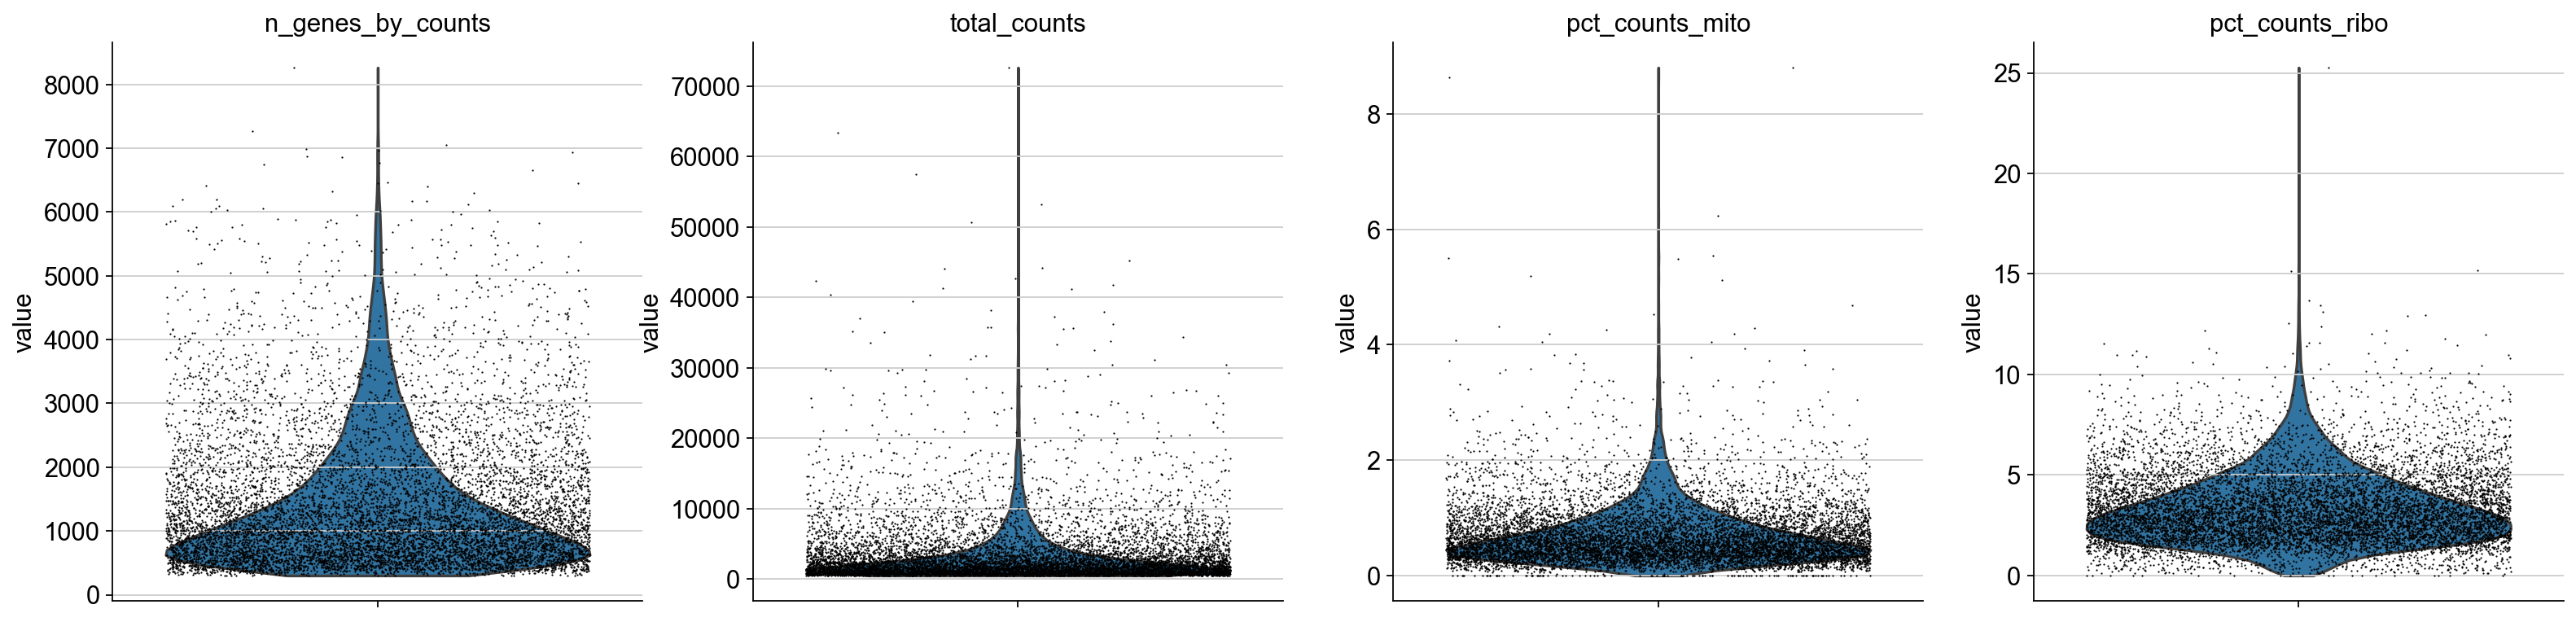

In [21]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mito', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)

##### Add sample sex covariates

##### Cell cycle scores

##### Predict doublets

##### Prepare counts for individual slots

##### Export object